В качестве курсового проекта для курса "Теория вероятности и математическая статистика" на GeekBrains я решил посчитать коррекляцию и вручную проверить что "Цена недвижимости в первую очередь определяется местоположением"

В данной работе я не буду делать подробно все выкладки, а для примера загружу только 5 показателей (кроме идентификационного) из тествого датасета

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **Price** - Стоимость жилья

Очищу их от кажущихся мне выбросов. Покажу на примере инструментов python. А затем выполню расчет коррекляции по формулам. При этом попытаюсь понять, можно ли было с помощью анализа только корреляции прийти к такому-же выводу.

Для решения задачи по теории вероятности я планирую сделать следюущее:

1. Загрузить данные.
2. Очстить от выбросов.
3. Показать на красивых картинках корреляцию между показателями.
4. Попытаться с помощью "ручного" расчета корреляции получить такой же результат.


### Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

### Загрузка тестового датасета из файла

In [2]:
TRAIN_DATASET_PATH = './train.csv'

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, usecols=['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'Price'])
train_df.tail(n=2)

,Id,DistrictId,Rooms,Square,LifeSquare,Price
9998,5400,75,2.0,43.602562,33.840147,181595.339808
9999,6306,128,1.0,38.666645,21.157874,218714.077615


### Приведение типов данных

In [4]:
train_df = train_df.convert_dtypes()

In [5]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

## Корректировка данных для использования в моделировании

### Square, LifeSquare, KitchenSquare

LifeSquare имеет значение NULL в тестовых и в тренировочных данных. Пусть это означает, что в помещении нет жилой площади. Может техническое какое-то. Заменим это значение на 0.

In [6]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = 0

In [7]:
train_df = train_df.loc[train_df['Square'] <= 223.5]
train_df = train_df.loc[train_df['LifeSquare'] <= 303.5]

### Rooms

In [8]:
train_df.loc[train_df['Rooms'].isin([0, 5, 6, 10, 19]), 'Rooms'] = train_df['Rooms'].median()

### Построение новых признаков

<AxesSubplot:>

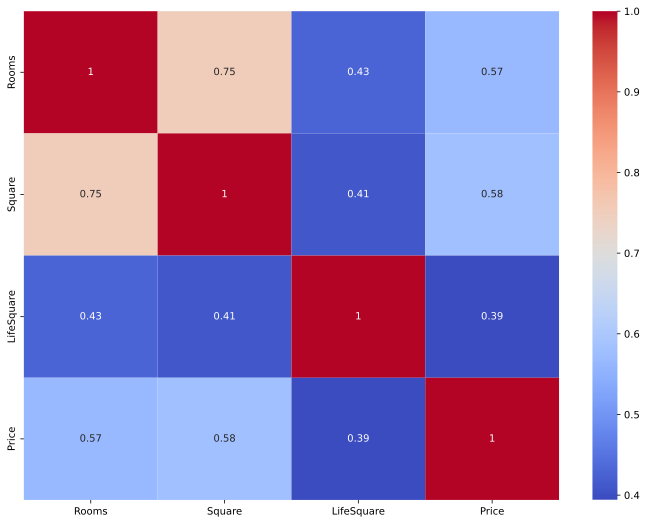

In [9]:
corrmat = train_df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap='coolwarm', annot = True)

Коэффициенты коррекляции в с показателем 'Price' больше всего у параметров 'Rooms' и 'Square'. Но, если выводить эти таблицы для каждого из кварталов, то картина будет немного иной.

<AxesSubplot:>

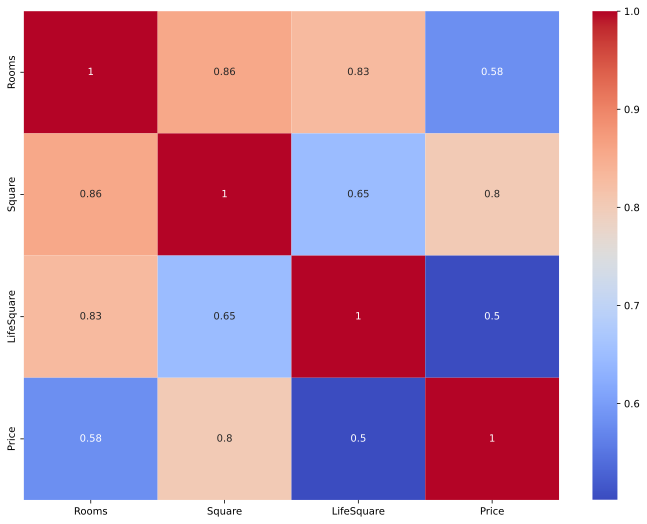

In [10]:
df_35 = train_df.loc[train_df['DistrictId']=='35']
# df_35.head()

corrmat_35 = df_35.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_35, cmap='coolwarm', annot = True)

In [11]:
train_df['Rooms'] = train_df['Rooms'].astype(float)
train_df['Square'] = train_df['Square'].astype(float)
train_df['LifeSquare'] = train_df['LifeSquare'].astype(float)
train_df['Price'] = train_df['Price'].astype(float)

Теперь попробую получить похожий результат, проверив корреляцию при помощи расчета коэффициентов из математической статистики.

Расчет средних значений:

In [12]:
Rooms_avg = np.mean(train_df["Rooms"])
print(f'Среднее значение "Rooms" = {Rooms_avg}')
Square_avg = np.mean(train_df["Square"])
print(f'Среднее значение "Square" = {Square_avg}')
LifeSquare_avg = np.mean(train_df["LifeSquare"])
print(f'Среднее значение "LifeSquare" = {LifeSquare_avg}')
Price_avg = np.mean(train_df["Price"])
print(f'Среднее значение "Price" = {Price_avg}')

Среднее значение "Rooms" = 1.8828296978186911
Среднее значение "Square" = 56.14039990010147
Среднее значение "LifeSquare" = 28.433939439707625
Среднее значение "Price" = 214119.469777611


Расчет среднеквадратичных отклонений:

In [13]:
sigma_Rooms = np.sqrt(1 / 9994 * np.sum((train_df["Rooms"] - Rooms_avg) ** 2))
print(f'Среднеквадратичное отклонение "Rooms" = {sigma_Rooms}')
sigma_Square = np.sqrt(1 / 9994 * np.sum((train_df["Square"] - Square_avg) ** 2))
print(f'Среднеквадратичное отклонение "Square" = {sigma_Square}')
sigma_LifeSquare = np.sqrt(1 / 9994 * np.sum((train_df["LifeSquare"] - LifeSquare_avg) ** 2))
print(f'Среднеквадратичное отклонение "LifeSquare" = {sigma_LifeSquare}')
print()
sigma_Price = np.sqrt(1 / 9994 * np.sum((train_df["Price"] - Price_avg) ** 2))
print(f'Среднеквадратичное отклонение "Price" = {sigma_Price}')


Среднеквадратичное отклонение "Rooms" = 0.8002272025868808
Среднеквадратичное отклонение "Square" = 19.025116259688183
Среднеквадратичное отклонение "LifeSquare" = 21.648516733288485

Среднеквадратичное отклонение "Price" = 92834.5986589343


Расчет ковариации:

In [14]:
cov_Rooms_Price = 1 / 9994 * np.sum((train_df["Rooms"]-Rooms_avg) * (train_df["Price"]-Price_avg))
print(f'cov("Rooms", "Price") = {cov_Rooms_Price}')
cov_Square_Price = 1 / 9994 * np.sum((train_df["Square"]-Rooms_avg) * (train_df["Price"]-Price_avg))
print(f'cov("Square", "Price") = {cov_Square_Price}')
cov_LifeSquare_Price = 1 / 9994 * np.sum((train_df["LifeSquare"]-Rooms_avg) * (train_df["Price"]-Price_avg))
print(f'cov("LifeSquare", "Price") = {cov_LifeSquare_Price}')

cov("Rooms", "Price") = 41986.313629623866
cov("Square", "Price") = 1022496.9076778041
cov("LifeSquare", "Price") = 791848.1266930802


Проверка расчета ковариации. Т.е. расчет с помощью встроенных функций библиотеки NUmPy.

In [15]:
print(f'cov("Rooms", "Price") = {np.cov(train_df["Rooms"], train_df["Price"])}')
print(f'cov("Square", "Price") = {np.cov(train_df["Square"], train_df["Price"])}')
print(f'cov("LifeSquare", "Price") = {np.cov(train_df["LifeSquare"], train_df["Price"])}')

cov("Rooms", "Price") = [[6.40427657e-01 4.19905152e+04]
 [4.19905152e+04 8.61912514e+09]]
cov("Square", "Price") = [[3.61991270e+02 1.02259923e+06]
 [1.02259923e+06 8.61912514e+09]]
cov("LifeSquare", "Price") = [[4.68705175e+02 7.91927367e+05]
 [7.91927367e+05 8.61912514e+09]]


Данные совпадают, значит формулы были введены правильно.

In [16]:
crr_Rooms_Price = cov_Rooms_Price / (sigma_Rooms * sigma_Price)
print(f'corr("Rooms", "Price") = {crr_Rooms_Price}')
crr_Square_Price = cov_Square_Price / (sigma_Square * sigma_Price)
print(f'corr("Square", "Price") = {crr_Square_Price}')
crr_LifeSquare_Price = cov_LifeSquare_Price / (sigma_LifeSquare * sigma_Price)
print(f'corr("LifeSquare", "Price") = {crr_Rooms_Price}')

corr("Rooms", "Price") = 0.5651771184006489
corr("Square", "Price") = 0.5789283530335981
corr("LifeSquare", "Price") = 0.5651771184006489


Проверка расчета корреляции. Т.е. расчет с помощью встроенных функций библиотеки NUmPy.

In [17]:
print(f'corr("Rooms", "Price") = {np.corrcoef(train_df["Rooms"], train_df["Price"])}')
print(f'corr("Square", "Price") = {np.corrcoef(train_df["Square"], train_df["Price"])}')
print(f'corr("LifeSquare", "Price") = {np.corrcoef(train_df["LifeSquare"], train_df["Price"])}')

corr("Rooms", "Price") = [[1.         0.56517712]
 [0.56517712 1.        ]]
corr("Square", "Price") = [[1.         0.57892835]
 [0.57892835 1.        ]]
corr("LifeSquare", "Price") = [[1.         0.39400695]
 [0.39400695 1.        ]]


Данные совпадают, значит формулы были введены правильно.

Более того, данные совпадают с рассчитанными с помощью функций pandas. Т.е. расчеты произведены совершенно корректно.

### Задача по курсу теория вероятности и математическая статистика

Посчитать коэффициенты коррекляции для между показателями  'Rooms', 'Square', 'LifeSquare' и 'Price' отдельно для каждого 'DistrictId'. И проверю предположение, что они улучшаться "статистически значимо" лучше средних показателей по всей выборке.

Создание нового датафрейма, в котором будут храниться статистическме данные:

In [18]:
statistic_df = None

colls = {'DistrictId': [], 'Rooms_corr': [], 'Square_corr': [], 'LifeSquare_corr': []}
statistic_df = pd.DataFrame(colls)
print(statistic_df)

Empty DataFrame
Columns: [DistrictId, Rooms_corr, Square_corr, LifeSquare_corr]
Index: []


In [19]:
districts = train_df['DistrictId'].unique()
                     
for DistrictID in districts:
    tmp_df = train_df.loc[train_df['DistrictId'] == DistrictID]
    tmp_dict = {'DistrictId': DistrictID, 
                         'Rooms_corr': np.corrcoef(tmp_df["Rooms"], tmp_df["Price"])[0][1], 
                         'Square_corr': np.corrcoef(tmp_df["Square"], tmp_df["Price"])[0][1], 
                         'LifeSquare_corr': np.corrcoef(tmp_df["LifeSquare"], tmp_df["Price"])[0][1]}
    statistic_df = statistic_df.append(tmp_dict, 
                        ignore_index=True)
    tmp_df = None
    tmp_dict = None

Естественно, что где-то получились значения NaN (NULL, ...). Заменим их на 0.

In [20]:
statistic_df.loc[statistic_df['Rooms_corr'].isnull(), 'Rooms_corr'] = 0
statistic_df.loc[statistic_df['Square_corr'].isnull(), 'Square_corr'] = 0
statistic_df.loc[statistic_df['LifeSquare_corr'].isnull(), 'LifeSquare_corr'] = 0

In [21]:
statistic_df

,DistrictId,Rooms_corr,Square_corr,LifeSquare_corr
0,35,0.579538,0.802857,0.501627
1,41,0.600346,0.765767,0.711907
2,53,0.801078,0.857898,0.373799
3,58,0.703757,0.585907,0.382844
4,99,0.575526,0.688617,0.621695
...,...,...,...,...
200,202,-1.000000,-1.000000,-1.000000
201,184,0.634681,-0.007380,0.201750
202,205,0.000000,0.000000,0.000000
203,209,0.000000,0.000000,0.000000


Проверка того, что коэффициент корреляции для показателя 'Rooms' улучшится.

    Гипотеза H_0: Rooms_corr = 0,55
    Гипотеза H_1: Rooms_corr > 0,55    

In [22]:
Rooms_t_n = statistic_df["Rooms_corr"].count()
Rooms_t_avg = np.mean(statistic_df["Rooms_corr"])
Rooms_t_aim = 0.55
Rooms_t_sigma = np.sqrt(1 / Rooms_t_n * np.sum((statistic_df["Rooms_corr"] - Rooms_t_avg) ** 2))

T_Rooms = (Rooms_t_avg-Rooms_t_aim)/Rooms_t_sigma*np.sqrt(Rooms_t_n)
print(f'T,z = {T_Rooms}')

T,z = 1.1466171370755778


Для уровня значимости $$\alpha=0,05$$

$$Ф(u_{кр})=(1-2α)/2=0,45 => u_{кр}=1,645$$

Полученное значение T,z явно меньше 1,645. Поэтому, скорее всего, корреляция количества комнат с ценой квартиры не улучшается при исследовании по кавраталам.

Проверка того, что коэффициент корреляции для показателя 'Square' улучшится.

    Гипотеза H_0: Rooms_corr = 0,58
    Гипотеза H_1: Rooms_corr > 0,58

In [23]:
Square_t_n = statistic_df["Square_corr"].count()
Square_t_avg = np.mean(statistic_df["Square_corr"])
Square_t_aim = 0.58
Square_t_sigma = np.sqrt(np.sum((statistic_df["Square_corr"] - Square_t_avg) ** 2) / 205)

T_Square = (Square_t_avg-Square_t_aim)/Square_t_sigma*np.sqrt(Square_t_n)
print(f'T,z = {T_Square}')

T,z = 3.1183579226824616


Полученное значение T,z явно больше 1,645. Поэтому, предположение об улучшении корреляции при анализе по кварталам - верное. Общая площадь в рамкаках вкартала является хорошим индикатором при определении цены.

Проверка того, что коэффициент корреляции для показателя 'LifeSquare' улучшится.

    Гипотеза H_0: Rooms_corr = 0,39
    Гипотеза H_1: Rooms_corr > 0,39

In [24]:
LifeSquare_t_n = statistic_df["LifeSquare_corr"].count()
LifeSquare_t_avg = np.mean(statistic_df["LifeSquare_corr"])
LifeSquare_t_aim = 0.39
LifeSquare_t_sigma = np.sqrt(1 / LifeSquare_t_n * np.sum((statistic_df["LifeSquare_corr"] - LifeSquare_t_avg) ** 2))
# print(LifeSquare_t_avg, LifeSquare_t_aim, LifeSquare_t_sigma)

T_LifeSquare = (LifeSquare_t_avg-LifeSquare_t_aim)/LifeSquare_t_sigma*np.sqrt(LifeSquare_t_n)  
print(f'T,z = {T_LifeSquare}')

T,z = 5.081748283993353


Полученное значениеT,z явно больше 1,645. Поэтому, предположение об улучшении корреляции при анализе по кварталам - верное. Жилая площадь в рамкаках вкартала является хорошим индикатором при определении цены.

В результате получилось доказать, что разбиение по кварталам действительно улучшает коррекляцию между стоимостью и площадью жилья. Из этого в дальнейшем был сделан вывод, что необходимо ввести новый показатель: "Средняя цена квадратного метра для каждого квартала". Это позволило хорошо решить поставленную выше задачу.